# Introduction to basic visualizations of multidimensional data - PCA

**Topics**
* basic data normalization
* scatter plots, boxplots, heatmaps 
* principal component analysis (PCA)

Principal component analysis (PCA) is a linear transformation method that is often used in exploratory data analysis. It is also used as a dimensionality reduction method. PCA is useful when having a data set with a large number of correlated variables. The method reduces the number of dimensions (variables) while retaining information that contributes to the variance between samples. PCA yields new dimensions called principal components that are based on the covariance or correlation of the original variables. 



## Loading a data set

We here use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) [\[1\]](#Dua2019) as an example to illustrate different visualization methods. The data set can be loaded into Python using the [scikit-learn](https://scikit-learn.org/stable/) [\[2\]](#Pedregosa2011) machine learning library. Summary information on the data set is available and can be printed. The data contains 30 real-valued features (or variables) for 569 samples. The features describe characteristics of cell nuclei present in images of fine needle aspiration biopsies of breast masses. Additionally, the data set contains information on whether the breast tumors were diagnosed as malignant or benign.

In [1]:
from sklearn import datasets
# load the example data set
data = datasets.load_breast_cancer()
# print summary information
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In the next step, we will convert the loaded data to a [pandas](https://pandas.pydata.org/) [\[3\]](#Hawkins2020) DataFrame object. The data frame contains samples in rows and features in columns. This is one option to work with the tabular data and will make it easy for us to process the data and create plots.

In [2]:
import pandas as pd
# convert data to pandas DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
# print DataFrame object
print(df)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [3]:
# print summary information for all variables
with pd.option_context("display.max_columns", df.shape[1]):
    print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

The loaded data set provides information on the breast tumor diagnosis coded as 0 and 1. We create a one-dimensional array with the diagnosis of all samples using more human readable values _malignant_ and _benign_.

In [4]:
# diagnosis for all samples is coded as 0 and 1 in data.target
# the names to which 0 and 1 correspond are stored in data.target_names
# create an array with diagnosis names of all samples
diagnosis = pd.Series([data.target_names[_] for _ in data.target],
                      dtype = "category")
# print summary
print(diagnosis.describe())

count        569
unique         2
top       benign
freq         357
dtype: object


## Data normalization (standardization)

In this example data set, the units of measurements are not the same for all variables. PCA works best when the different variables are on the same scale. To achieve this, we perform a normalization procedure. The term normalization can refer to different methods. The method that we use here is called standardization. The features are standardized by **zero-centering, i.e. subtracting the mean value,** and **scaling to unit variance, i.e. dividing by the standard deviation.** The standardized values are also called z-scores.

In [5]:
from sklearn import preprocessing
# standardize the data (mean-centering and scaling to unit-variance)
std_scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)
df_standardized =  pd.DataFrame(
    std_scaler.fit_transform(df), index = df.index, columns = df.columns)
# perform mean-centering, but no scaling
center_scaler = preprocessing.StandardScaler(with_mean = True, with_std = False)
df_centered =  pd.DataFrame(
    center_scaler.fit_transform(df), index = df.index, columns = df.columns)
# print values before and after normalization
for _df, title in ((df, "Raw data"), (df_standardized, "Standardized data")):
    print(title)
    print(_df.describe())

Raw data
       mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]
Standardized data
        mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count  5.690000e+02  5.690000e+02  ...    5.690000e+02             5.690000e+02
mean  -3.162867e-15 -6.530609e-15  ...   -2.289567e-15             2.575171e-15

### Visualizing the standardized data

We use a boxplot and heatmap of raw and standardized data to visualize the data transformation. You can see that samples can now be compared to each other based on all variables, and not just based on those with the highest values.

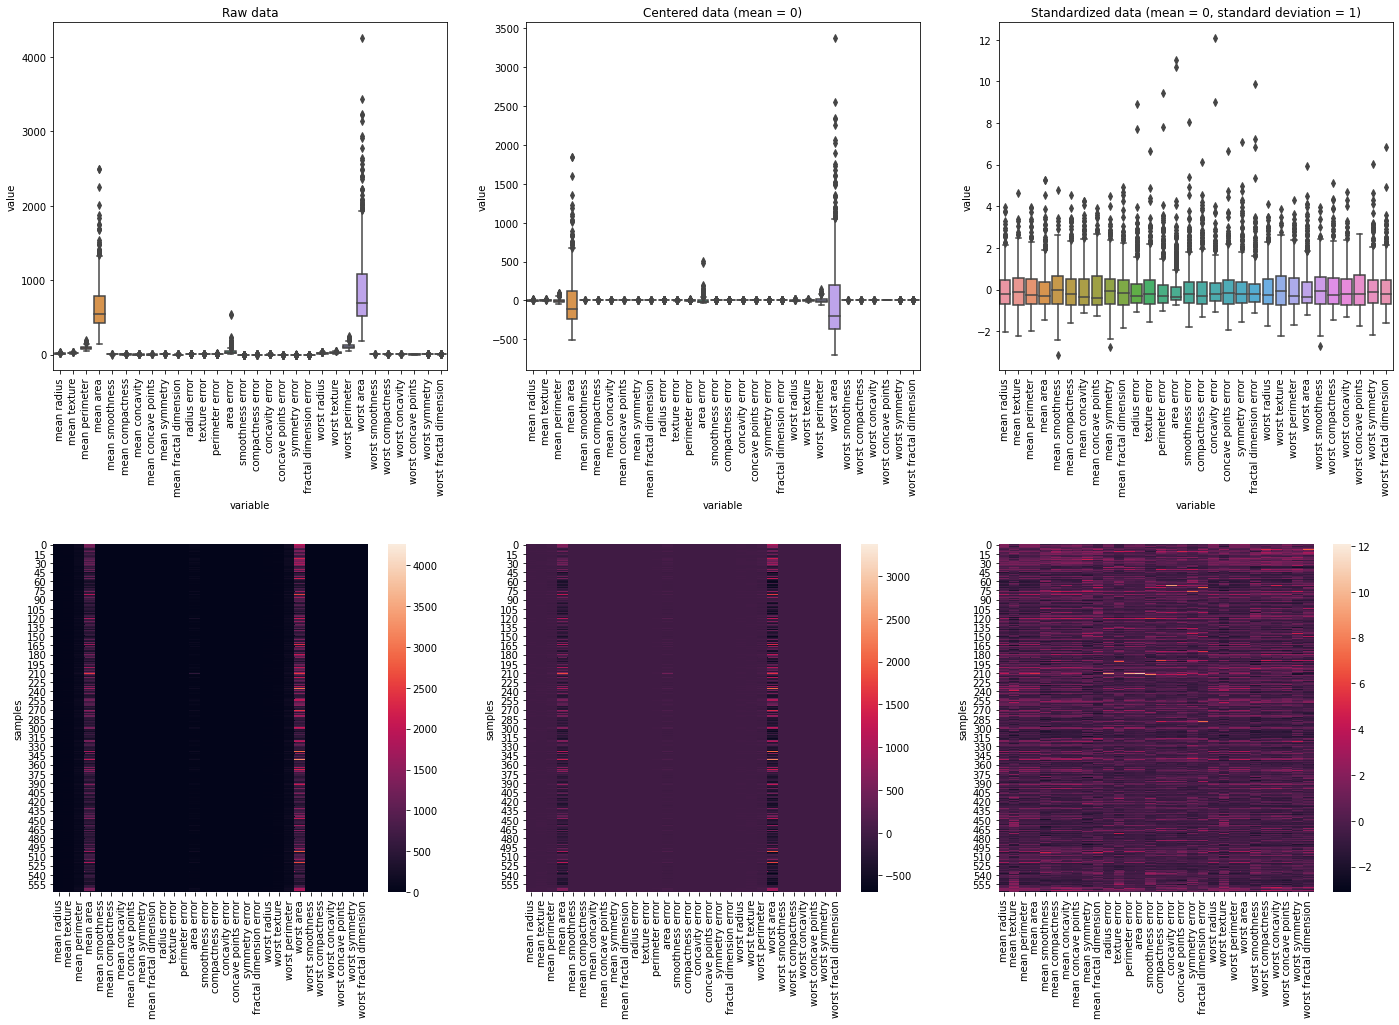

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# new 2 by 3 plot area
fig, axes = plt.subplots(2, 3, figsize = (24, 16))
for idx, _df in enumerate((df, df_centered, df_standardized)):
    # plot boxplot
    sns.boxplot(
        x = "variable", y = "value", data = pd.melt(_df), ax = axes[0, idx])
    axes[0, idx].set_xticklabels(
        axes[0, idx].get_xticklabels(), 
        fontdict = {"verticalalignment": "top", "horizontalalignment": "center"},
        rotation = 90)
    # plot heatmap 
    sns.heatmap(_df, ax = axes[1, idx])
    axes[1, idx].set_ylabel("samples")
# add plot titles
axes[0, 0].set_title("Raw data")
axes[0, 1].set_title("Centered data (mean = 0)")
axes[0, 2].set_title("Standardized data (mean = 0, standard deviation = 1)")
# adjust horizontal padding
plt.subplots_adjust(hspace = 0.5)
plt.savefig("data.png", dpi = 300)

## Covariance and correlation (Pearson's r)

Covariance and Pearson correlation coefficients are calculated and the covariance/correlation matrices are visualized using a heatmap. 

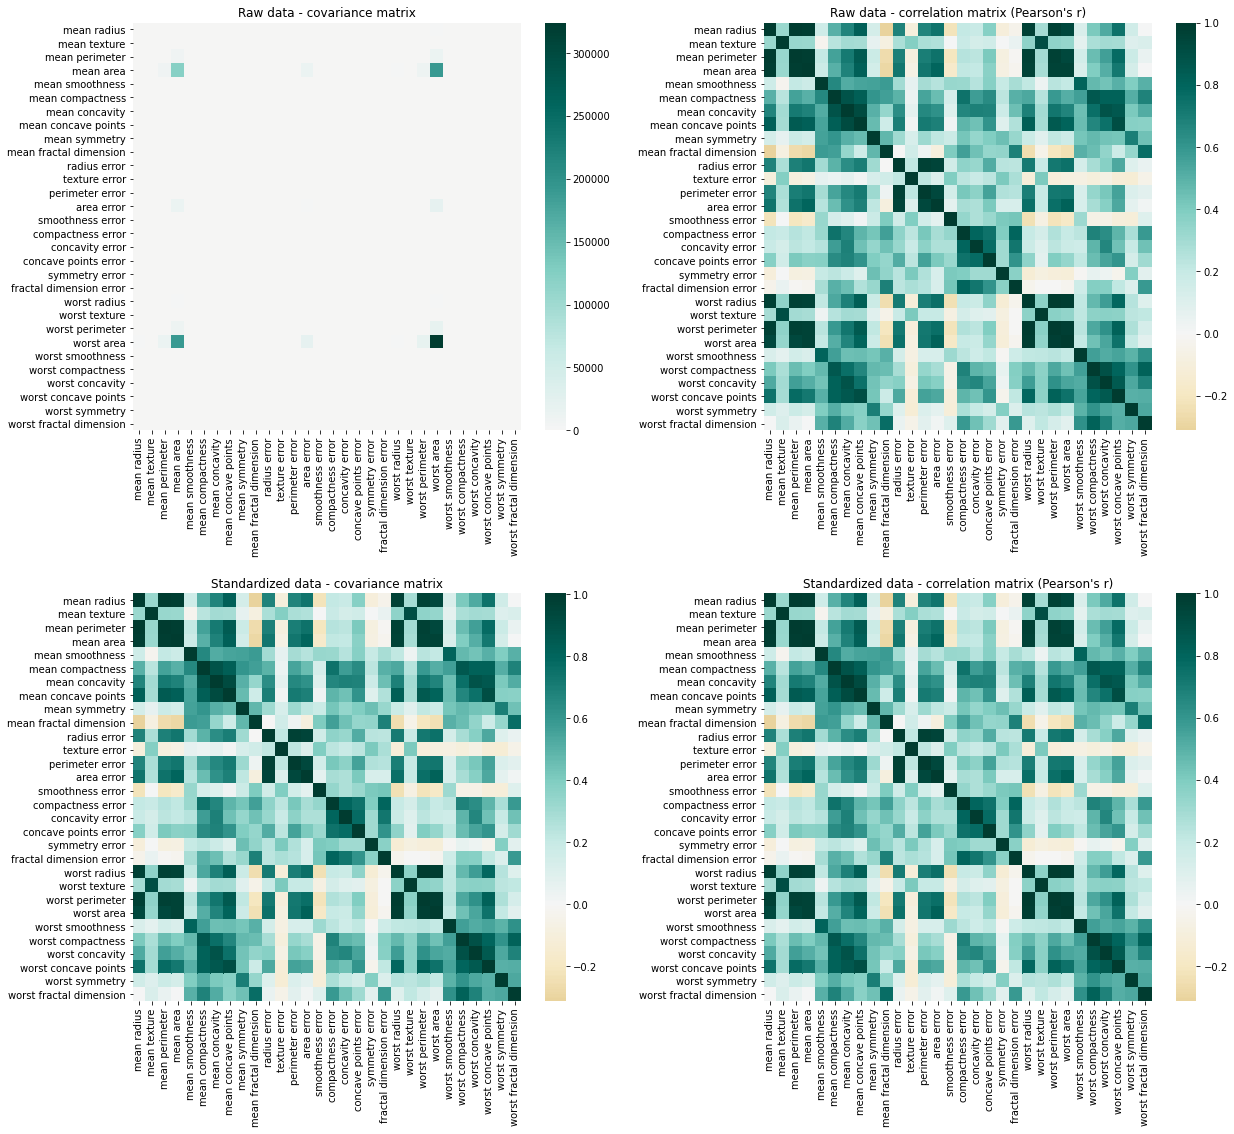

In [7]:
# feature correlation matrix heatmap
fig, axes = plt.subplots(2, 2, figsize = (20, 18))
for idx, (_df, title) in enumerate(((df, "Raw data"), 
                                    (df_standardized, "Standardized data"))):
    # calculate covariance matrix
    df_cov = _df.cov()
    # calculate Pearson correlation matrix
    df_corr = _df.corr(method = "pearson")
    # plot heatmaps of matrices
    sns.heatmap(df_cov, center = 0, cmap = "BrBG", ax = axes[idx, 0])
    sns.heatmap(df_corr, center = 0, cmap = "BrBG", ax = axes[idx, 1])
    # add titles
    axes[idx, 0].set_title("{0} - covariance matrix".format(title))
    axes[idx, 1].set_title("{0} - correlation matrix (Pearson's r)".format(title))
# adjust space between plots
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.savefig("cov.png", dpi=300)

In the heatmap of the correlation matrix, we can see that some features are more correlated than others. For example, `mean radius`, `mean perimeter`, and `mean area` are highly positively correlated (Pearson r ≈ 1), i.e. that there is a linear relationship between these variables (note that we haven't tested whether this correlation is statistically significant). In contrast, `mean smoothness` and `mean texture` have a low correlation coefficient (Pearson r ≈ 0). 

We also see that for the standardized data, the covariance matrix and the correlation matrix are identical.

## 2D scatter plots 

In this example data set, we have two categories of samples: tumors diagnosed as either malignant or benign. For each sample, we have values for 30 different features extracted from digitized biopsy images. In order to understand which of these 30 features could be suitable to distinguish a malignant from a benign sample, we can start by plotting two variables against each other.

First, a function to create a scatter plot with marginal distributions (histogram and kernel density estimation) is defined.

In [8]:
# define function for scatter plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


def plot_joint_scatter(df, x, y, groups, group_names):
    """Plot joint 2D scatter plot and marginal distributions for one or more 
    groups. 

    Parameters:
        df (pandas.DataFrame): Samples-by-features data frame (row x col)
        x (str): Name of feature to plot on x-axis
        y (str): Name of feature to plot on y-axis
        groups (pandas.Series): Group membership of samples
        group_names (list of str): Group names
    """
    # create new plot
    jointplot_2d = sns.JointGrid(x = x, y = y, data = df)
    # add scatter plot
    jointplot_2d = jointplot_2d.plot_joint(
        sns.scatterplot, hue = groups, style = groups)
    # add distributions (histograms)
    sns.histplot(df, x = x, ax = jointplot_2d.ax_marg_x, 
                 hue = groups, kde = True)
    sns.histplot(df, y = y, ax = jointplot_2d.ax_marg_y,
                 hue = groups, kde = True)
    # calculate correlation coefficient
    r2, pval = stats.pearsonr(df[x], df[y])
    print("{0}, {1}\n\tPearson r = {2:.2f}; p = {3:.1e}".format(x, y, r2, pval))
    return jointplot_2d


def multiplot_joint_scatter(df, features_to_plot, groups, groups_names):
    """Combine multiple plots from 'plot_joint_scatter' into one figure.

    Parameters:
        df (pandas.DataFrame): Samples-by-features data frame (row x col)
        features_to_plot (tuple of tuple of str): x, y feature combinations
        groups (pandas.Series): Group membership of samples
        group_names (list of str): Group names
    """
    fig = plt.figure()
    ax_counter = 0
    for idx, (x, y) in enumerate(features_to_plot):
        j = plot_joint_scatter(df, x, y, groups, groups_names)
        for idx2, ax in enumerate(j.fig.axes):
            # add ax to figure
            ax.remove() # remove ax from joint plot figure 'j'
            ax.figure = fig # add ax to new figure 'fig'
            fig.axes.append(ax)
            fig.add_axes(ax)
            # shift position of each ax
            old_pos = np.array(ax.get_position()).flatten() # x0, y0, x1, y1
            tmp_pos = old_pos + idx # shift position 
            tmp_pos[[1, 3]] = old_pos[[1, 3]] # keep original y0 and y1
            new_pos = [tmp_pos[0], tmp_pos[1], # x0, y0
                    tmp_pos[2]-tmp_pos[0], tmp_pos[3]-tmp_pos[1]] # width, height
            fig.axes[ax_counter].set_position(new_pos) # x0, y0, width, height
            ax_counter += 1
    return


Next, we call the function to plot the features. Change `features_to_plot` to plot different featues against each other.

It is clear that this approach is not feasible for data sets with many variables.

mean radius, mean perimeter
	Pearson r = 1.00; p = 0.0e+00
mean concavity, mean concave points
	Pearson r = 0.92; p = 6.8e-235
mean smoothness, mean texture
	Pearson r = -0.02; p = 5.8e-01


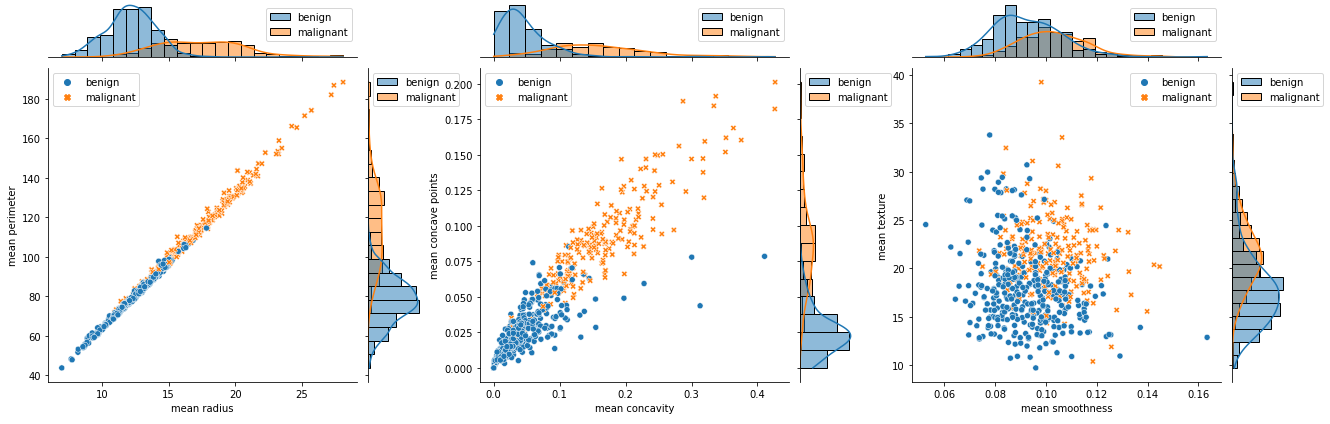

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [9]:
# define which features to plot
# YOU CAN CHANGE THESE VARIABLES
features_to_plot = (("mean radius", "mean perimeter"), 
                    ("mean concavity", "mean concave points"),
                    ("mean smoothness", "mean texture"))
# plot scatter plots for different combinations of given features 
multiplot_joint_scatter(df, features_to_plot, diagnosis, data.target_names)

## Principal component analysis

Since, we are interested in which variables contribute most to the variance between the samples, we can apply PCA. This is an **unsupervised learning method**, i.e. that the information about the diagnosis of the samples is not used. We only use it to color the different samples. Methods that include output information like diagnosis are called supervised learning methods.

### PCA with two variables

To illustrate PCA, smaller data sets with two variables only are used. These are the same variables plotted above in the scatter plots.

First, functions for PCA calculation and plotting are defined.

In [10]:
# define function for PCA with two variables only
import numpy as np
from sklearn import decomposition

def plot_pca_two_vars(df, x, y, diagnosis, title):
    fig, axes = plt.subplots(1, 3, figsize = (18, 5.5))
    # scatterplot of two features
    sns.scatterplot(
        x = x, y = y, data = df,
        hue = diagnosis, style = diagnosis, ax = axes[0])
    # PCA of two features
    pca = decomposition.PCA(n_components = 2)
    transformed = pca.fit_transform(df.loc[:,(x,y)]) # two columns only
    # # variance explained by principal components
    # print("Explained variance:", pca.explained_variance_ratio_)
    # plot scores
    sns.scatterplot(
        x = transformed[:,0], y = transformed[:,1], # PC1, PC2
        hue = diagnosis, style = diagnosis, ax = axes[1])
    # add PCs to scatterplot
    for pc, label in enumerate(("PC 1", "PC 2")):
        axes[0].annotate(
            "", 
            xy = pca.mean_, 
            xytext = pca.mean_ + 3*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc]),
            arrowprops = {"arrowstyle": "<-", 
                          "linewidth": 2, 
                          "shrinkA": 0, 
                          "shrinkB": 0})
        axes[0].text(
            *(pca.mean_ + 3.6*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc])),
            label, color = "k", ha = "center", va = "center")
    # add horizontal and vertical line through origin
    axes[1].axvline(0, c = "k")
    axes[1].axhline(0, c = "k")
    # normalize loadings to size of plot
    minx, maxx = axes[1].get_xlim()
    #print(x, y, pca.components_) # pc by var
    loadings = pca.components_ / abs(np.amax(pca.components_)) * 0.3 * abs(maxx-minx)
    # add loadings
    for idx, var in enumerate((x, y)):
        axes[1].annotate(
            "", (0, 0), (loadings[0, idx], loadings[1, idx]), 
            arrowprops = {"arrowstyle": "<-", 
                          "color": sns.color_palette()[3],
                          "linewidth": 2, 
                          "shrinkA": 0, 
                          "shrinkB": 0})
        axes[1].text(
            1.2*loadings[0, idx], 1.2*loadings[1, idx],
            var, color = sns.color_palette()[3], ha = "center", va = "center")
    # set equal dimensions for x and y axis
    axes[0].axis("equal")
    axes[1].axis("equal")
    # plot explained variance per component and cumulative variance explained
    expl_var = pd.DataFrame({
        "Principal component": [str(pc+1) for pc in range(len(pca.explained_variance_ratio_))],
        "Explained variance [%]": pd.Series(pca.explained_variance_ratio_) * 100})
    expl_var["Cumulative explained variance"] = np.cumsum(expl_var["Explained variance [%]"])
    sns.lineplot(
        x = "Principal component", y = "Cumulative explained variance", 
        data = expl_var, ax = axes[2], color = sns.color_palette()[3], 
        label = "Cumulative explained variance")
    sns.barplot(
        x = "Principal component", y = "Explained variance [%]", 
        data = expl_var, ax = axes[2], color = sns.color_palette()[0])
    # add labels and titles
    axes[1].set_xlabel(
        "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
    axes[1].set_ylabel(
        "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
    axes[0].set_title("2D scatter plot")
    axes[1].set_title("PCA")
    plt.suptitle(title)
    plt.show()

We now plot a scatter plot of the two variables, a PCA biplot, and a bar plot of the variance between the samples that is explained by the principal components (PCs, also called factors). This is done for both the raw data and the standardized data.

The first PC is a vector that captures most of the variation between the samples. It is a linear combination of the original variables. The second PC is orthogonal to the first one.

In the biplot (middle), the scores of the samples for PC 1 and PC 2 are plotted against each other. This results in a rotated version of the scatter plot on the left. 

The loadings of the original variables on the new factors are plotted in red (note that they are on a different scale than the scores; they are scaled to fit into the plot area). These correspond to the covariance (raw data) or correlation (standardized data) between the variables and the principal components.

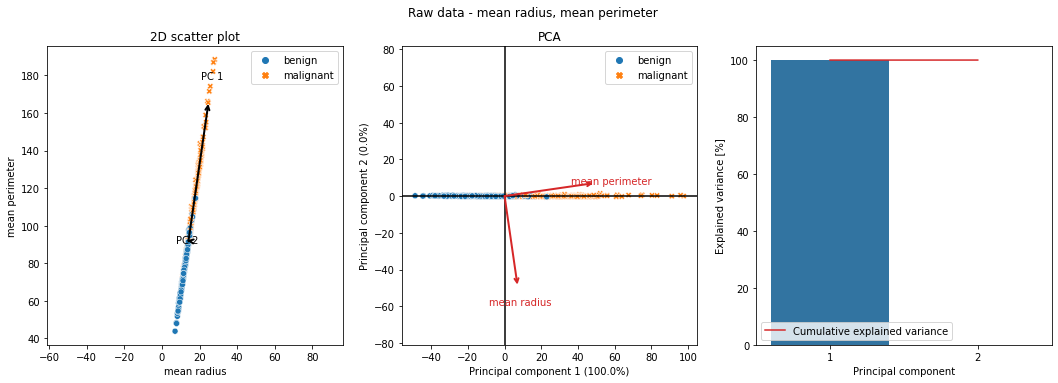

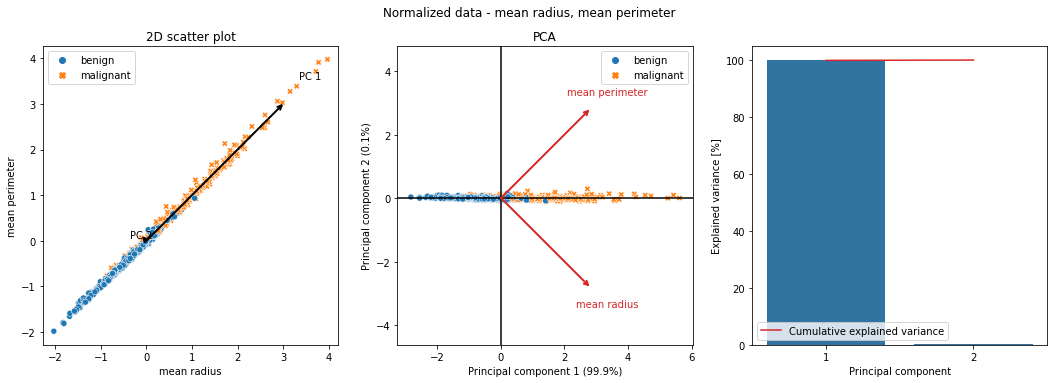

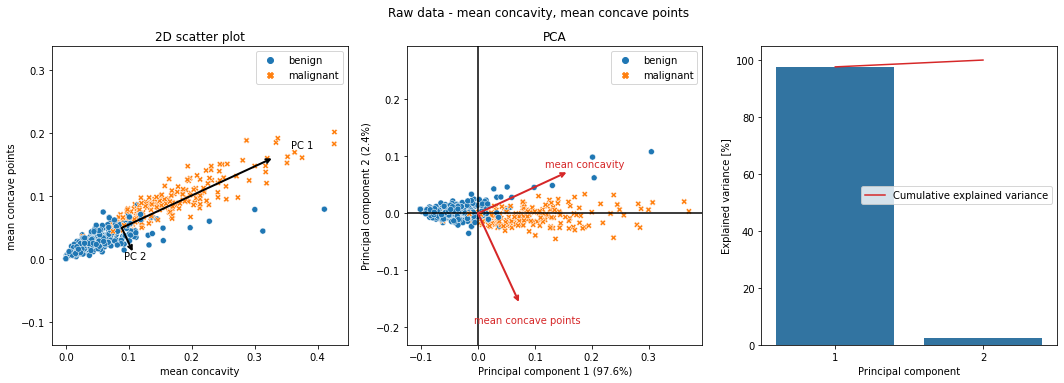

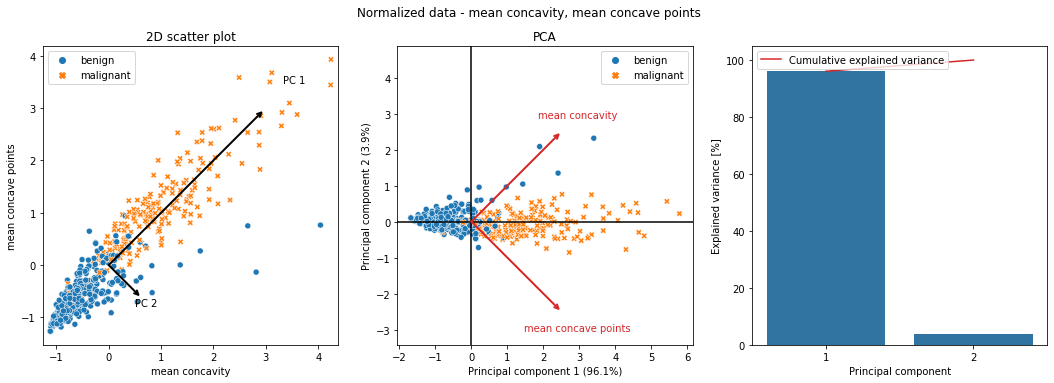

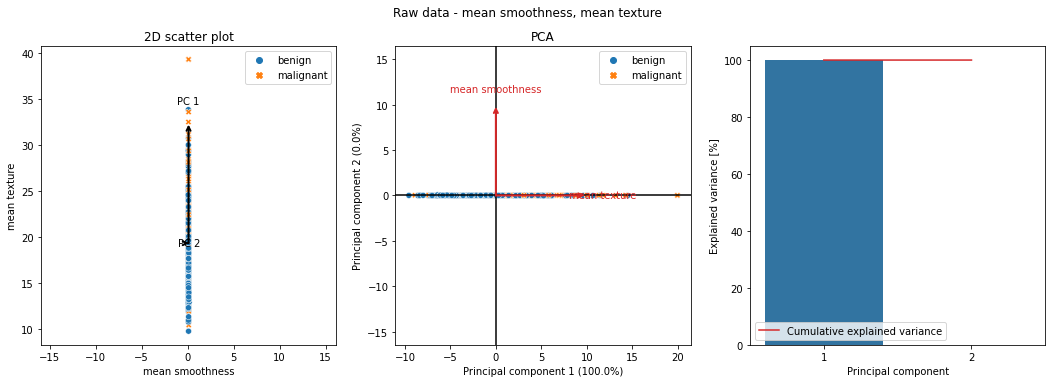

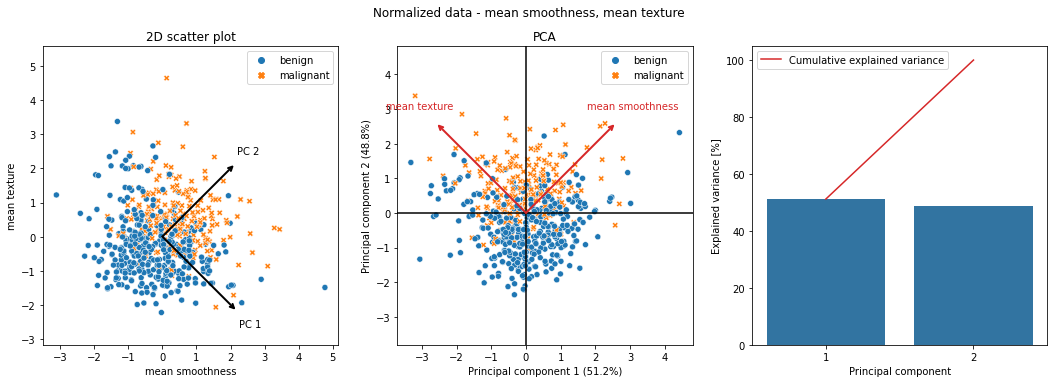

In [11]:
# plot PCA with 2 variables
for x, y in features_to_plot:
    plot_pca_two_vars(df, x, y, diagnosis, 
                      "Raw data - {0}, {1}".format(x, y))
    plot_pca_two_vars(df_standardized, x, y, diagnosis, 
                      "Normalized data - {0}, {1}".format(x, y))

### PCA with the complete data set

Finally, we perform a PCA using the complete data set.

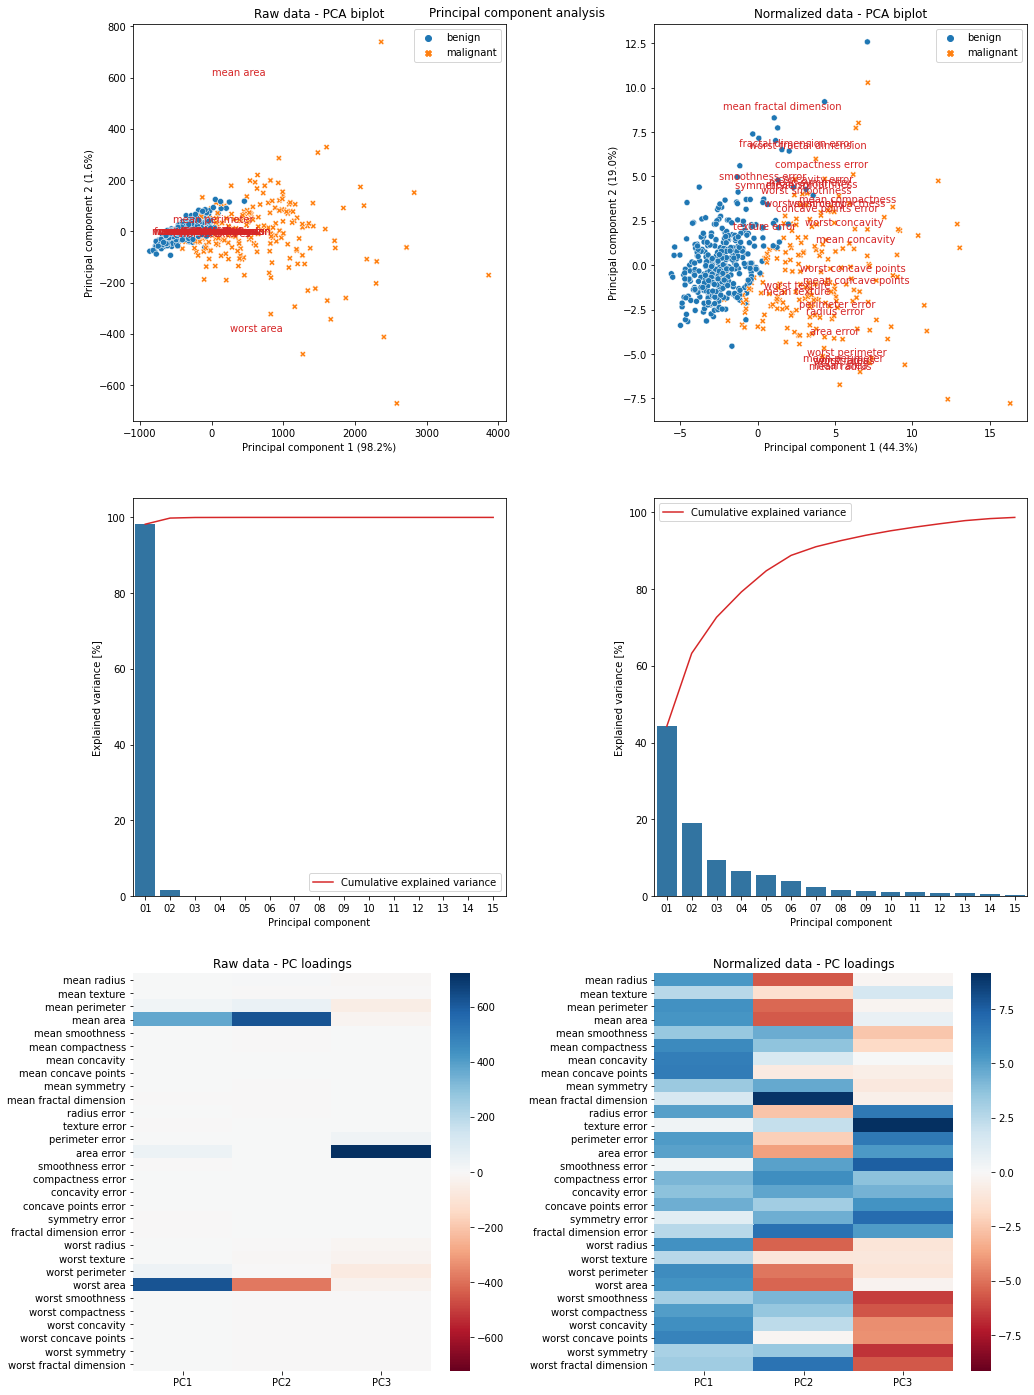

In [12]:
# PCA - biplot
from sklearn import decomposition
fig, axes = plt.subplots(3, 2, figsize = (15, 20))
for _df, ax, title in ((df, 0, "Raw data"), 
                       (df_standardized, 1, "Normalized data")):
    pca = decomposition.PCA(n_components = 15)
    transformed = pca.fit_transform(_df)
    sns.scatterplot(
        x = transformed[:,0], # PC1 
        y = transformed[:,1], # PC2
        hue = diagnosis, style = diagnosis, ax = axes[0,ax])
    # normalize loadings to size of plot
    minx, maxx = axes[0,ax].get_ylim()
    loadings = pca.components_ / abs(np.amax(pca.components_[0:2,:])) * 0.4 * abs(maxx-minx)
    # add loadings
    for idx, var in enumerate(_df.columns):
        axes[0,ax].text(
            loadings[0, idx], loadings[1, idx],
            var, color = sns.color_palette()[3], ha = "center", va = "center")
    axes[0,ax].set_xlabel(
        "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
    axes[0,ax].set_ylabel(
        "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
    axes[0,ax].set_title(title + " - PCA biplot")
    #axes[0,ax].axis("equal")
    # plot explained variance per component and cumulative variance explained
    expl_var = pd.DataFrame({
        "Principal component": ["{0:02d}".format(pc+1) for pc in range(len(pca.explained_variance_ratio_))],
        "Explained variance [%]": pd.Series(pca.explained_variance_ratio_) * 100})
    expl_var["Cumulative explained variance"] = np.cumsum(expl_var["Explained variance [%]"])
    sns.lineplot(
        x = "Principal component", y = "Cumulative explained variance", 
        data = expl_var, ax = axes[1,ax], color = sns.color_palette()[3], 
        label = "Cumulative explained variance")
    sns.barplot(
        x = "Principal component", y = "Explained variance [%]", 
        data = expl_var, ax = axes[1,ax], color = sns.color_palette()[0])
    # plot loadings of first PCs
    sns.heatmap(loadings[:3,].transpose(), annot = False, cmap= "RdBu", 
                vmin = -abs(loadings[:3,]).max(), vmax = abs(loadings[:3,]).max(),
                ax = axes[2,ax])
    axes[2,ax].set_yticklabels(_df.columns)
    axes[2,ax].set_xticklabels(["PC1", "PC2", "PC3"])
    axes[2,ax].set_title(title + " - PC loadings")
fig.tight_layout(pad = 3.0)
plt.suptitle("Principal component analysis")
plt.savefig("pca.png", dpi=300)
plt.show()

## References

1. <a name="Dua2019">Dua, D. and Graff, C. (2019).</a> [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.
1. <a name="Pedregosa2011">Pedregosa et al. (2011).</a> [Scikit-learn: Machine Learning in Python](http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), JMLR 12, pp. 2825-2830.
1. <a name="Hawkins2020">Simon Hawkins. (2020, May 28).</a> pandas-dev/pandas: Pandas 1.0.4 (Version v1.0.4). Zenodo. http://doi.org/10.5281/zenodo.3862857